In [1]:
import math
from itertools import count

import pandas as pd

In [2]:
frames = []
for i in (1, 10, 20, 30, 40):
    frames.append(pd.read_csv(f'results/omp/staticO3/csr_{i}'))
names = frames[0]['File'].str.replace('/data/fdonnini/', '')
time = {'Matrix': names}
flops = {'Matrix': names}
for i, df in enumerate(frames):
    time[(1, 10, 20, 30, 40)[i]] = df['mean_time [s]'] * 1000
    flops[(1, 10, 20, 30, 40)[i]] = df['FLOPS'] * 10**-9
time = pd.DataFrame(time)
flops = pd.DataFrame(flops)

In [3]:
info = pd.read_csv('info.csv')
info

,Matrix name,M,N,NZ,avg_nzr,max_nzr,csr_size,hll_size(32),hll_size(64),hll_size(128),hll_size(160)
0,adder_dcop_32,1813,1813,11246,6.20298,1310,142248,572564,613044,1549540,695876
1,af_1_k101,503625,503625,17550675,34.84870,35,212622644,211522060,211464868,211447724,211448748
2,af23560,23560,23560,460598,19.55000,21,5621460,5922924,5921132,5921780,5919660
3,amazon0302,262111,262111,1234877,4.71127,5,15867012,15792256,15759496,15748576,15743112
4,bcsstk17,10974,10974,428650,39.06050,150,5187740,6837172,7098460,7288468,7375788
5,cage4,9,9,49,5.44444,6,668,724,724,724,724
6,cant,62451,62451,4007383,64.16840,78,48338444,54623400,56607784,56642816,56608488
7,cavity10,2597,2597,76171,29.33040,62,924484,1787368,1816416,1833784,1830848
8,cop20k_A,121192,121192,2624331,21.65430,81,31976784,37511748,38109076,38463452,38660604
9,Cube_Coup_dt0,2164760,2164760,124406070,57.46880,68,1501531924,1552457676,1564938956,1574351604,1581202764


In [4]:
frames[0]['File']

0       /data/fdonnini/adder_dcop_32.mtx
1           /data/fdonnini/af_1_k101.mtx
2             /data/fdonnini/af23560.mtx
3          /data/fdonnini/amazon0302.mtx
4            /data/fdonnini/bcsstk17.mtx
5               /data/fdonnini/cage4.mtx
6                /data/fdonnini/cant.mtx
7            /data/fdonnini/cavity10.mtx
8            /data/fdonnini/cop20k_A.mtx
9       /data/fdonnini/Cube_Coup_dt0.mtx
10                /data/fdonnini/dc1.mtx
11    /data/fdonnini/FEM_3D_thermal1.mtx
12              /data/fdonnini/lung2.mtx
13    /data/fdonnini/mac_econ_fwd500.mtx
14               /data/fdonnini/mcfe.mtx
15           /data/fdonnini/mhd4800a.mtx
16            /data/fdonnini/mhda416.mtx
17         /data/fdonnini/ML_Laplace.mtx
18           /data/fdonnini/nlpkkt80.mtx
19              /data/fdonnini/olafu.mtx
20            /data/fdonnini/olm1000.mtx
21              /data/fdonnini/PR02R.mtx
22           /data/fdonnini/raefsky2.mtx
23             /data/fdonnini/rdist2.mtx
24         /data

In [5]:
cuda_csr = pd.read_csv('results/cuda/feb06_csr_100.csv')
cuda_csr['matrix'].str.replace('.mtx', '')
cuda_csr['flops'] = cuda_csr['flops'] * 10**-6
cuda_csr = cuda_csr.drop(columns=['dev'])
cuda_csr.to_latex("cuda_csr_flops.tex", escape=True, float_format='%.4f', index=False)

In [6]:
cuda_hll = pd.read_csv('results/cuda/feb06_hll_100_32.csv')
cuda_hll['flops'] = cuda_hll['flops'] * 10**-6
cuda_hll = cuda_hll.drop(columns=['dev'])
cuda_hll.to_latex("cuda_hll_flops.tex", escape=True, float_format='%.4f', index=False)

In [7]:
import pandas as pd
frames = [pd.read_csv(f'results/omp/staticO3/csr_{i}') for i in range(1, 41)]
frames[0]['File'].loc[0].replace('/data/fdonnini/', '').replace('.mtx', '')

'adder_dcop_32'

In [8]:
import matplotlib.pyplot as plt


def get_times(frames, i):
    return [frame['mean_time [s]'].loc[i] * 1000 for frame in frames]

def get_flops(frames, i):
    return [frame['FLOPS'].loc[i] * 10**-6 for frame in frames]

def name(s):
    return s.replace('/data/fdonnini/', '').replace('.mtx', '')

def plot_times(frames, idxs, y_lim=None):
    ys = [get_times(frames, i) for i in idxs]
    x = [j for j in range(1, 41)]
    for i in range(len(idxs)):
        plt.plot(x, ys[i], color=['b', 'r', 'g', 'c', 'y'][i], label=name(frames[0]['File'].loc[idxs[i]]))
    if y_lim is not None:
        bottom, top = y_lim
        plt.ylim(bottom, top)
    # Add labels and title
    plt.xlabel('#thread')
    plt.ylabel('mean time (ms)')
    plt.legend()

    # Show the plot
    plt.show()

def plot_flops(frames, idxs, y_lim=None):
    ys = [get_flops(frames, i) for i in idxs]
    x = [j for j in range(1, 41)]
    for i in range(len(idxs)):
        plt.plot(x, ys[i], color=['b', 'r', 'g', 'c', 'y'][i], label=name(frames[0]['File'].loc[idxs[i]]))
    if y_lim is not None:
        bottom, top = y_lim
        plt.ylim(bottom, top)
    # Add labels and title
    plt.xlabel('#thread')
    plt.ylabel('GFlops')
    plt.legend()

    # Show the plot
    plt.show()

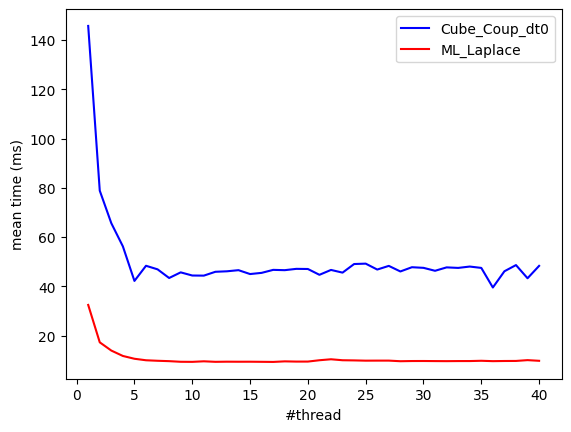

In [9]:
plot_times(frames, [9, 17])

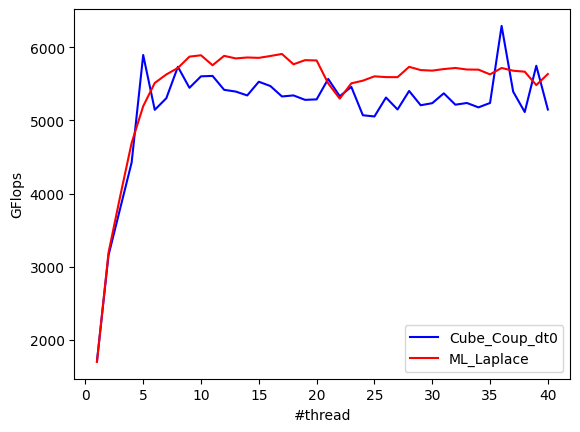

In [10]:
plot_flops(frames, [9, 17])

In [13]:
import math

minimums = []
for i in cuda_csr.index:
    m = min(get_times(frames, i))
    if math.isclose(m, 0.0):
        m = 1e-8
    minimums.append(m)
minimums = pd.Series(minimums)
minimums

0     1.400000e-02
1     4.570000e+00
2     3.600000e-02
3     1.690000e-01
4     3.500000e-02
5     1.000000e-08
6     4.010000e-01
7     1.400000e-02
8     4.100000e-01
9     3.955000e+01
10    2.830000e-01
11    3.200000e-02
12    4.300000e-02
13    8.900000e-02
14    9.000000e-03
15    1.600000e-02
16    5.000000e-03
17    9.338000e+00
18    8.240000e+00
19    6.300000e-02
20    3.000000e-03
21    1.754000e+00
22    2.800000e-02
23    1.200000e-02
24    1.136000e+00
25    5.400000e-02
26    3.630000e+00
27    6.700000e-02
28    1.409000e+00
29    5.000000e-03
dtype: float64

In [14]:
cuda_csr['time'] / minimums

0          5.173071
1          0.875017
2          1.090611
3          0.475213
4          2.194571
5     444000.000000
6          2.408267
7          3.026000
8          1.145080
9          0.759109
10        22.290509
11         1.423938
12         0.785209
13         1.059326
14         3.035444
15         1.699750
16         2.476200
17         0.916753
18         0.512040
19         2.225984
20         2.082333
21         1.012972
22         3.638750
23         2.215333
24         0.162677
25         0.786259
26         0.171909
27         0.971567
28         0.291004
29         2.018400
dtype: float64

In [15]:
comparison = pd.DataFrame()
comparison['matrix'] = cuda_csr['matrix']
comparison['time'] = pd.DataFrame(cuda_csr['time'] / minimums)
comparison

,matrix,time
0,adder_dcop_32.mtx,5.173071
1,af_1_k101.mtx,0.875017
2,af23560.mtx,1.090611
3,amazon0302.mtx,0.475213
4,bcsstk17.mtx,2.194571
5,cage4.mtx,444000.000000
6,cant.mtx,2.408267
7,cavity10.mtx,3.026000
8,cop20k_A.mtx,1.145080
9,Cube_Coup_dt0.mtx,0.759109


In [16]:
info['cmp'] = pd.DataFrame(cuda_csr['time'] / minimums)

In [19]:
omp = info[info['cmp'] > 1.0]
omp['csr_size'] = omp['csr_size'] * 1e-6
omp

/tmp/ipykernel_97464/932545845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omp['csr_size'] = omp['csr_size'] * 1e-6


,Matrix name,M,N,NZ,avg_nzr,max_nzr,csr_size,hll_size(32),hll_size(64),hll_size(128),hll_size(160),cmp
0,adder_dcop_32,1813,1813,11246,6.20298,1310,0.142248,572564,613044,1549540,695876,5.173071
2,af23560,23560,23560,460598,19.55000,21,5.621460,5922924,5921132,5921780,5919660,1.090611
4,bcsstk17,10974,10974,428650,39.06050,150,5.187740,6837172,7098460,7288468,7375788,2.194571
5,cage4,9,9,49,5.44444,6,0.000668,724,724,724,724,444000.000000
6,cant,62451,62451,4007383,64.16840,78,48.338444,54623400,56607784,56642816,56608488,2.408267
7,cavity10,2597,2597,76171,29.33040,62,0.924484,1787368,1816416,1833784,1830848,3.026000
8,cop20k_A,121192,121192,2624331,21.65430,81,31.976784,37511748,38109076,38463452,38660604,1.145080
10,dc1,116835,116835,766396,6.55964,114190,9.664136,60674932,109051344,157279844,204002632,22.290509
11,FEM_3D_thermal1,17880,17880,430740,24.09060,27,5.240444,5797660,5795428,5794684,5794308,1.423938
13,mac_econ_fwd500,206500,206500,1273389,6.16653,44,16.106712,55628116,67177884,71008612,74844980,1.059326


In [26]:
max(omp['NZ'])

8185136

In [18]:
cuda = info[info['cmp'] < 1.0]
cuda['csr_size'] *= 1e-6
cuda

/tmp/ipykernel_97464/2668633744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuda['csr_size'] *= 1e-6


,Matrix name,M,N,NZ,avg_nzr,max_nzr,csr_size,hll_size(32),hll_size(64),hll_size(128),hll_size(160),cmp
1,af_1_k101,503625,503625,17550675,34.84870,35,212.622644,211522060,211464868,211447724,211448748,0.875017
3,amazon0302,262111,262111,1234877,4.71127,5,15.867012,15792256,15759496,15748576,15743112,0.475213
9,Cube_Coup_dt0,2164760,2164760,124406070,57.46880,68,1501.531924,1552457676,1564938956,1574351604,1581202764,0.759109
12,lung2,109460,109460,492564,4.49995,8,6.348652,9817324,9914236,10076332,10130116,0.785209
17,ML_Laplace,377002,377002,27582698,73.16330,74,332.500428,334598932,334565436,334585636,334663220,0.916753
18,nlpkkt80,1062400,1062400,28192672,26.53680,28,342.561708,343014852,343430404,343405340,344483748,0.512040
24,roadNet-PA,1090920,1090920,3083796,2.82678,9,41.369276,55151108,57864308,59880932,61427228,0.162677
25,thermal1,82654,82654,574458,6.95015,11,7.224156,8573012,8832636,8964692,9033244,0.786259
26,thermal2,1228045,1228045,8580313,6.98697,11,107.875980,127349200,131193136,133061584,134100064,0.171909
27,thermomech_TK,102158,102158,711558,6.96527,10,8.947372,10116004,10344388,10503332,10626004,0.971567


In [18]:
comparison[comparison['time'] <= 1.0]

,matrix,time
1,af_1_k101.mtx,0.875017
3,amazon0302.mtx,0.475213
9,Cube_Coup_dt0.mtx,0.759109
12,lung2.mtx,0.785209
17,ML_Laplace.mtx,0.916753
18,nlpkkt80.mtx,0.512040
24,roadNet-PA.mtx,0.162677
25,thermal1.mtx,0.786259
26,thermal2.mtx,0.171909
27,thermomech_TK.mtx,0.971567
